In [25]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### CALCULATING ANGLES BETWEEN VECTORS

θ = cos-1  (A⋅B / ||A||||B|| )


In [26]:
# FUNCTION TO CALCULATE THETA 

def angle_calculator(vector_A, vector_B):

    # convert to an array for mathmatical ease 
    A = np.array(vector_A)
    B = np.array(vector_B)

    # calculate the dot product
    dot_product = np.dot(A, B)

    # calculate the magnitude of vector (length / norm of vector)
    magnitude_A = np.linalg.norm(vector_A)
    magnitude_B = np.linalg.norm(vector_B)

    # cosθ
    cos_theta = dot_product / (magnitude_A * magnitude_B)

    # θ in radians
    theta_radians = np.arccos(cos_theta)

    # θ in degrees
    theta_degrees = np.degrees(theta_radians)

    return theta_degrees


PLOT ANGLES OVER TIME

observe how they change dynamically - can give you a sense of the movement behavior and help identify specific time periods of interest (identify trends)

In [27]:

def trajectory_angle(directory):

    angles = []
    times = []

    
    for file in os.listdir(directory):

        if file.endswith("tracks.csv"):
            
            # join the directory and filename so you can read it

            file_path = os.path.join(directory, file)
            
            # read the csv file
            df = pd.read_csv(file_path)
        
            for track in df['track_id'].unique():
                
                track_unique = df[df['track_id'] == track]

                track_unique = track_unique.sort_values(by='frame').reset_index(drop=True)
            
                for i in range(len(track_unique) - 1):

                    vector_a = track_unique.iloc[i][['x_body', 'y_body']].values
                    vector_b = track_unique.iloc[i + 1][['x_body', 'y_body']].values

                    angle = angle_calculator(vector_a, vector_b)


                    angles.append(angle)
                    times.append(track_unique.iloc[i + 1]['frame'])

    return angles, times


In [28]:
angles, times = trajectory_angle("/Volumes/lab-windingm/home/users/cochral/AttractionRig/modelling-behaviour/extract/test-for-script")

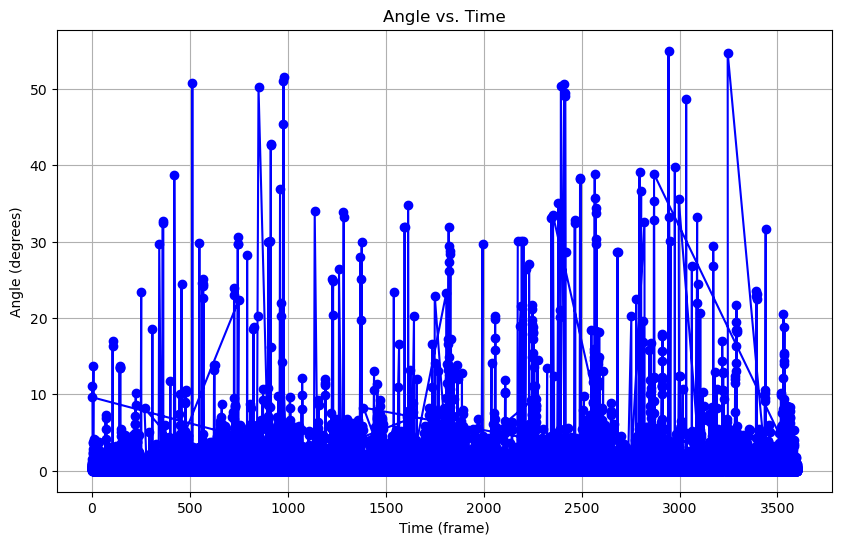

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(times, angles, marker='o', linestyle='-', color='b')
plt.xlabel('Time (frame)')
plt.ylabel('Angle (degrees)')
plt.title('Angle vs. Time')
plt.grid(True)
plt.show()



PLOT ANGLE DISTRIBUTION

help in recognizing dominant movement patterns

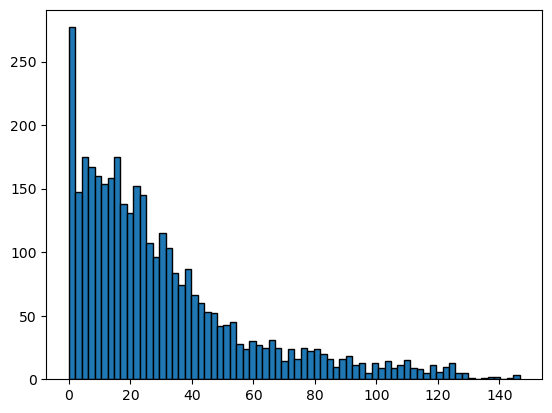

In [30]:
plt.hist(angles_test, bins=70, edgecolor='black')

plt.show()